In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
data = np.load("data/science2k-doc-word.npy")
title = []
for line in open("data/science2k-titles.txt"):
    title.append(line.rstrip())

In [3]:
# Select K
def elbow_method(data):
    K = range(1, 25)
    dist = []
    d_k = []
    for k in K:
        clf = KMeans(n_clusters=k, init='k-means++', max_iter=500)
        clf.fit(data)
        centers = clf.cluster_centers_
        labels = clf.labels_
        cluster = {label:[] for label in set(labels)}
        dist_ = clf.transform(data)
        for i, label in enumerate(labels):
            cluster[label].append(dist_[i][label])
        tmp = 0
        for i in range(k):
            for dist in cluster[i]:
                tmp += dist ** 2
        d_k.append(tmp)
    plt.plot(K, d_k, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Dist')
    plt.title('Elbow Method')
    plt.show()

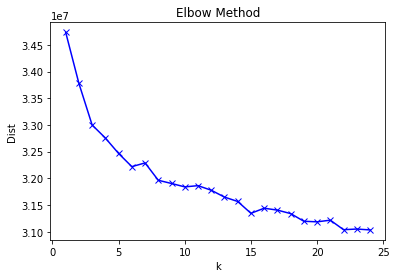

In [4]:
elbow_method(data)

In [5]:
def run_kmean(data, title, k):
    clf = KMeans(n_clusters=k, init='k-means++', max_iter=500)
    clf.fit(data)
    centers = clf.cluster_centers_
    dist = clf.transform(data)
    labels = clf.labels_
    cluster = {label:[] for label in set(labels)}
    data_ = {label:[] for label in set(labels)}
    for i, label in enumerate(labels):
        data_[label].append((i, data[i]))
        cluster[label].append((i, dist[i][label]))

    mean = np.mean(data, axis=0)
    cluster_far = {}
    cluster_close = {}
    for i in range(k):
        farest = sorted(data_[i], key = lambda x: np.linalg.norm(x[1] - mean), reverse = True)[:10]
        tmp = []
        for index, d in farest:
            tmp.append(title[index])
        cluster_far[i] = tmp
    for i in range(k):
        cloest = sorted(cluster[i], key = lambda x: x[1])[:10]
        tmp = []
        for index, d in cloest:
            tmp.append(title[index])
        cluster_close[i] = tmp
    return cluster_far, cluster_close

## Problem (a)

In [6]:
cluster_far, cluster_close = run_kmean(data, title, 6)
for label, titles in cluster_far.items():
    print("-------")
    print("10 farest titles in Cluster %d: " %label, titles)
    print('\n')

-------
10 farest titles in Cluster 0:  ['"Atom-Scale Research Gets Real"', '"A Mouse Chronology"', '"Breakthrough of the Year: Genomics Comes of Age"', '"Infectious History"', '"Genomics: Journey to the Center of Biology"', '"Meltdown on Long Island"', '"Presidential Forum: Gore and Bush Offer Their Views on Science"', '"Designing a New Material World"', '"Deconstructing the Science Wars by Reconstructing an Old Mold"', '"Clones: A Hard Act to Follow"']


-------
10 farest titles in Cluster 1:  ['"Sedimentary Rocks of Early Mars"', '"Status and Improvements of Coupled General Circulation Models"', '"Piecing Together the Biggest Puzzle of All"', '"Timing the Ancestor of the HIV-1 Pandemic Strains"', '"NEAR at Eros: Imaging and Spectral Results"', '"The Formation and Early Evolution of the Milky Way Galaxy"', '"The Ascent of Atmospheric Sciences"', '"Subduction and Slab Detachment in the Mediterranean-Carpathian Region"', '"Climate Extremes: Observations, Modeling, and Impacts"', '"Plan

In [7]:
for label, titles in cluster_close.items():
    print("-------")
    print("10 closest titles in Cluster %d: " %label, titles)
    print('\n')

-------
10 closest titles in Cluster 0:  ['"Information Technology Takes a Different Tack"', '"Science Survives in Breakthrough States"', '"Vaccine Studies Stymied by Shortage of Animals"', '"For \'Father\' of Abortion Drug, Vindication at Last"', '"Flushing out Nasty Viruses in the Balkans"', '"On a Slippery Slope to Mediocrity?"', '"Privatizing the University: The New Tragedy of the Commons"', '"In Europe, Hooligans Are Prime Subjects for Research"', '"Japan\'s Whaling Program Carries Heavy Baggage"', '"Is AIDS in Africa a Distinct Disease?"']


-------
10 closest titles in Cluster 1:  ['"Greenland Ice Sheet: High-Elevation Balance and Peripheral Thinning"', '"Isotopic Evidence for Variations in the Marine Calcium Cycle over the Cenozoic"', '"Mass Balance of the Greenland Ice Sheet at High Elevations"', '"Rapid Kimberlite Ascent and the Significance of Ar-Ar Ages in Xenolith Phlogopites"', '"Discovery of a High-Energy Gamma-Ray-Emitting Persistent Microquasar"', '"The Role of the Sou

## Problem (b)

In [8]:
data_ = np.load("data/science2k-word-doc.npy")
vocab = []
for line in open("data/science2k-vocab.txt"):
    vocab.append(line.rstrip())

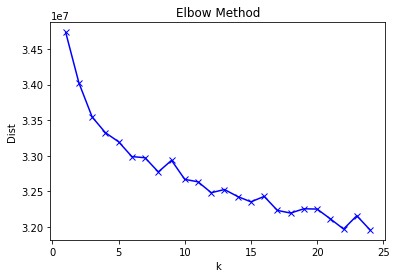

In [9]:
elbow_method(data_)

In [10]:
cluster_far_, cluster_close_ = run_kmean(data_, vocab, 6)
for label, titles in cluster_far_.items():
    print("-------")
    print("10 farest titles in Cluster %d: " %label, titles)
    print('\n')

-------
10 farest titles in Cluster 0:  ['system', 'state', 'important', 'right', 'field', 'process', 'point', 'provide', 'energy', 'case']


-------
10 farest titles in Cluster 1:  ['department', 'edu', 'report', 'mail', 'population', 'amount', 'established', 'production', 'entire', 'reduction']


-------
10 farest titles in Cluster 2:  ['cells', 'cell', 'protein', 'gene', 'control', 'type', 'human', 'specific', 'usa', 'found']


-------
10 farest titles in Cluster 3:  ['years', 'research', 'new', 'see', 'long', 'like', 'study', 'institute', 'early', 'center']


-------
10 farest titles in Cluster 4:  ['evidence', 'recent', 'major', 'species', 'area', 'laboratory', 'period', 'water', 'natural', 'source']


-------
10 farest titles in Cluster 5:  ['fig', 'observed', 'surface', 'analysis', 'model', 'shown', 'number', 'low', 'time', 'region']




In [11]:
for label, titles in cluster_close_.items():
    print("-------")
    print("10 closest titles in Cluster %d: " %label, titles)
    print('\n')

-------
10 closest titles in Cluster 0:  ['excitations', 'coulomb', 'insulating', 'spins', 'superposition', 'coherence', 'isotropic', 'resonant', 'anisotropic', 'magnetization']


-------
10 closest titles in Cluster 1:  ['rory', 'aptamers', 'dnag', 'nompc', 'doxy', 'lg268', 'proteorhodopsin', 'autophagy', 'trxr', 'lcts']


-------
10 closest titles in Cluster 2:  ['immunoprecipitated', 'polyacrylamide', 'lysates', 'wildtype', 'phosphorylated', 'kinases', 'saline', 'monoclonal', 'opin', 'reporter']


-------
10 closest titles in Cluster 3:  ['schools', 'weapons', 'recalls', 'clinton', 'geneticist', 'security', 'fight', 'prize', 'finished', 'spending']


-------
10 closest titles in Cluster 4:  ['interglacial', 'troposphere', 'subtropical', 'clim', 'tropospheric', 'radiocarbon', 'nifio', 'stratospheric', 'volcanism', 'upwelling']


-------
10 closest titles in Cluster 5:  ['figs', 'vertical', 'dashed', 'parameters', 'start', 'approximately', 'substantially', 'correlation', 'intensity', 